# MLR Model

In [1]:
# Import libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime as dt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats 
pd.set_option('display.max_columns', None)

%run ../assets/regression_metrics.py

|Predictive Variable|Data type|Description|
|:---|:---|:---|
|overall_qual|Scale of 1 to 10|Rates the overall material and finish of the house|
|full_bath|int|Full bathrooms above grade|
|year_built|int|Original construction date|
|gr_liv_area_log|log of square feet|Log of above grade (ground) living area square feet|
|neighborhood_price_high|0 or 1|Is the neighborhood one standard deviation above the mean price per square feet of the total data set|
|neighborhood_price_low|0 or 1|Is the neighborhood one standard deviation below the mean price per square feet of the total data set|
|has_pool|0 or 1|Does the home have a pool|
|ms_zoning_FV|0 or 1|Is the property in a Floating Village Residential Zone|
|ms_zoning_RL|0 or 1|Is the property in a Residential Low Density Zone|
|ms_zoning_RM|0 or 1|Residential Medium Density|
|exter_cond|Ordinal 1 to 5|Evaluates the present condition of the material on the exterior|
|lot_area_log|log of square feet|Lot size|
|bath_bed_ratio|float|Ratio between number of bathrooms to number of bedrooms|
|garage_qual_cars|float|Interaction between the quality of the garage and the number of cars it fits|
|bsmt_qual|Ordinal 1 to 5|Evaluates the height of the basement|
|has_remodel|0 or 1|Was the property recently remodeled|

### 1. Read in data

In [2]:
# load in train clean data from my pickle
train = pickle.load(open("../assets/train_clean_model.pkl", "rb"))

In [3]:
# load in kaggle test clean data from my pickle
kaggle_test = pickle.load(open("../assets/test_clean.pkl", "rb"))

In [4]:
# remove outliers for properties with square feet above 4000
train = train[train["saleprice"] < 400000]

In [5]:
# take the log of ssale price
train = train[train["gr_liv_area"] < 4000]

In [6]:
train["saleprice_log"] = np.log(train["saleprice"])

Take a log of my predictors that have a strong correlation > 0.7 with sale price

In [7]:
# take the log of square feet
train["lot_area_log"] = np.log(train["lot_area"])

In [8]:
# take the log of square feet
train["gr_liv_area_log"] = np.log(train["gr_liv_area"])

Set up our X and y variables

In [9]:
#starting with these variables that I selected from my correlation matrix in EDA
# features = ["overall_cond", "overall_qual", 
#             "full_bath", "bedroom_abvgr", 
#             "has_remodel", "year_built" , 
#             "gr_liv_area", "central_air", 
#             "fireplaces", "has_pool"]

# features = ["overall_qual", 
#              "full_bath", "bedroom_abvgr", 
#              "has_remodel", "year_built" , 
#              "gr_liv_area", "1st_flr_sf", 
#             "has_pool",
#             "neighborhood_price_high", "neighborhood_price_low",
#            "ms_zoning_FV", "ms_zoning_RL",
#            "ms_zoning_RM"]


features = ["overall_qual", 
             "full_bath", 
             "year_built" , 
             "gr_liv_area_log", 
            "neighborhood_price_high", "neighborhood_price_low",
            "has_pool",
           "ms_zoning_FV", "ms_zoning_RL",
           "ms_zoning_RM",
            "exter_cond",
           "lot_area_log", "bed_bath_ratio",
           "garage_qual_cars", "bsmt_qual",
           "has_remodel"]

# generate a list of columns that have the dummy variables for condition
condition_1 = list(train.columns[train.columns.str.contains("condition_1_")])

# append condition 1 columns to features list
features.extend(condition_1)

In [10]:
# set up my X and y variables
X = train[features]
y = train["saleprice_log"]

### 2 . Split our data into test and train. 
- Will keep the default split at 75% train and 25% test since I have a relatively big data set.

In [11]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 123)

### 3. Fit a linear regression model

In [12]:
# instantiate model
lr = LinearRegression()

# fit model on train and test split
lr.fit(X_train, y_train)
lr.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. Generate Predictions

In [13]:
# generate predicitions on train split
y_pred = lr.predict(X_train)

In [14]:
# generate predicitions on test split
y_pred_test = lr.predict(X_test)

### 5. Evaluate my model

In [15]:
# Train score
lr.score(X_train, y_train)

0.896697314704813

In [16]:
# Test score
lr.score(X_test, y_test)

0.9175006769284997

In [18]:
# cross validation score
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.8943723805507389

In [19]:
# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred)))
print(f"rmse: {rmse}")

rmse: 19814.37995067342


In [31]:
# get a summary of regression metrics. This is a custom function I created in ./assets/regression_metrics.py
regression_metrics(X_train, y_train, y_pred)

,index,Model Based on overall_qual full_bath year_built gr_liv_area_log neighborhood_price_high neighborhood_price_low has_pool ms_zoning_FV ms_zoning_RL ms_zoning_RM exter_cond lot_area_log bed_bath_ratio garage_qual_cars bsmt_qual has_remodel condition_1_Artery condition_1_Feedr condition_1_PosA condition_1_PosN condition_1_RRAe condition_1_RRAn condition_1_RRNe condition_1_RRNn
0,MAE,0.09
1,MSE,0.02
2,RSS,23.53
3,RMSE,0.13
4,R Squared,0.90
5,Adjusted R Squared,0.90


In [32]:
# summary of model for test split
regression_metrics(X_test, y_test, y_pred_test)

,index,Model Based on overall_qual full_bath year_built gr_liv_area_log neighborhood_price_high neighborhood_price_low has_pool ms_zoning_FV ms_zoning_RL ms_zoning_RM exter_cond lot_area_log bed_bath_ratio garage_qual_cars bsmt_qual has_remodel condition_1_Artery condition_1_Feedr condition_1_PosA condition_1_PosN condition_1_RRAe condition_1_RRAn condition_1_RRNe condition_1_RRNn
0,MAE,0.08
1,MSE,0.01
2,RSS,5.69
3,RMSE,0.11
4,R Squared,0.92
5,Adjusted R Squared,0.91


Plot my predicted sale prices vs. actual sale prices

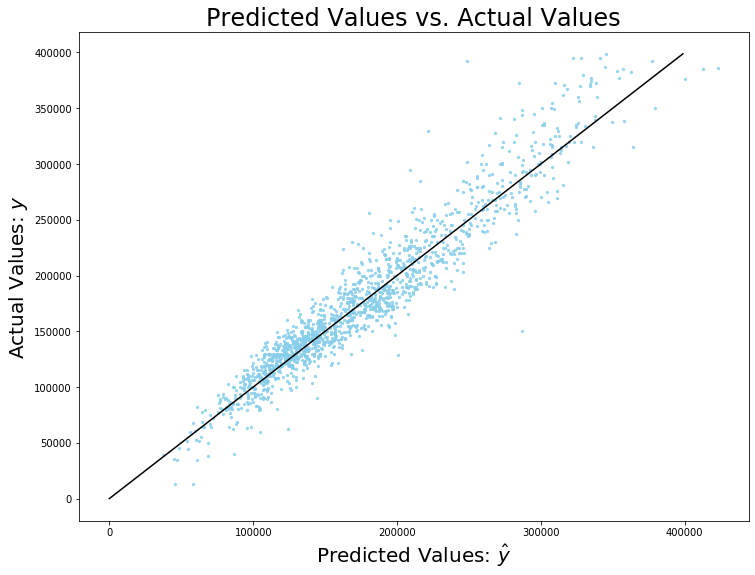

In [33]:
# Code from 3.01-lesson-linear_regression 
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(np.exp(y_pred), np.exp(y_train), s=5, color='skyblue', alpha = 0.8)

# Plot a line.
plt.plot([0, np.exp(np.max(y))],
         [0, np.exp(np.max(y))],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24)
plt.savefig('../plots/mlr.png');

I still see some spread among the homes greater than $300,000 but it looks slightly better than my previous linear regression model.

### 6. Run model on Kaggle test data

Set up X and y variables on Kaggle test dataset

In [256]:
# take log of square feet
kaggle_test["gr_liv_area_log"] = np.log(kaggle_test["gr_liv_area"])

In [257]:
# take log of square feet

kaggle_test["lot_area_log"] = np.log(kaggle_test["lot_area"])

In [258]:
# create X variable
X_kaggle = kaggle_test[features]

In [259]:
# generate predictions
y_preds = np.exp(lr.predict(X_kaggle))

In [260]:
# create a dataframe for submissions
submission = pd.DataFrame(y_preds, index=kaggle_test.index, columns=['SalePrice'])

In [261]:
# sort by index
submission.sort_index(inplace=True)

### Write out submission

In [113]:
# write to csv
submission.to_csv("../datasets/submission_mlr_11.csv")